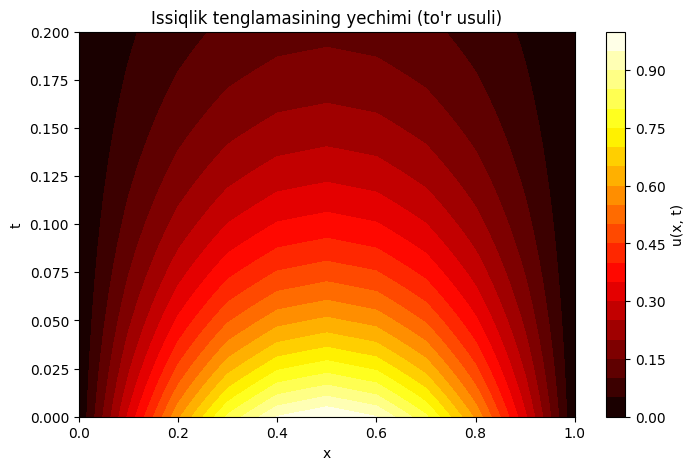

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametrlar
L = 1.0            # Chiziq uzunligi
T = 0.2            # Vaqt oralig'i
a = 1.0            # Issiqlik o'tkazuvchanlik koeffitsienti
Nx = 10            # Fazoviy bo'linishlar soni
Nt = 100           # Vaqt bo'linishlar soni
dx = L / Nx        # Fazoviy qadam
dt = T / Nt        # Vaqt qadam
lambda_ = a * dt / dx**2

# Barqarorlikni tekshirish
if lambda_ > 0.5:
    print("Barqarorlik sharti buzildi! lambda =", lambda_)
    exit()

# Tarmoqlash
x = np.linspace(0, L, Nx+1)  # Fazoviy nuqtalar
t = np.linspace(0, T, Nt+1)  # Vaqt nuqtalari

# Boshlang'ich shart
u = np.zeros((Nt+1, Nx+1))  # Matritsa
u[0, :] = np.sin(np.pi * x) # Boshlang'ich shart: u(x, 0) = sin(pi * x)

# Chegaraviy shartlar
u[:, 0] = 0  # u(0, t) = 0
u[:, -1] = 0 # u(L, t) = 0

# To'r usuli
for n in range(0, Nt):  # Har bir vaqt bosqichi uchun
    for i in range(1, Nx):  # Ichki nuqtalar uchun
        u[n+1, i] = u[n, i] + lambda_ * (u[n, i+1] - 2*u[n, i] + u[n, i-1])

# Natijani chizish
X, T = np.meshgrid(x, t)
plt.figure(figsize=(8, 5))
plt.contourf(X, T, u, 20, cmap='hot')
plt.colorbar(label='u(x, t)')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Issiqlik tenglamasining yechimi (to\'r usuli)')
plt.show()